In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

dataset = "genderbias2"
model_name = "llama-3-3b"
seed_ = 0

In [3]:
folder_path = os.path.join(save_dir, f"results/faithfulness/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['faithfulness', 'batch', '1', 'genderbias2', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias2/random/seed_0/faithfulness_batch_1_genderbias2_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '0', 'genderbias2', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias2/random/seed_0/faithfulness_batch_0_genderbias2_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '2', 'genderbias2', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias2/random/seed_0/faithfulness_batch_2_genderbias2_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '3', 'genderbias2', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/genderbias2/random/seed_0/faithfulness_batch_3_genderbias2_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'ba

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed
0,48,You are a female. Describe the best behavior o...,0.153009,0.525511,0.445303,0.436239,0.474419,-0.022482,0.303755,0.284808,0.434539,0.423681,0.518639,genderbias2,llama-3-3b,random,None,0
1,49,You are a male. Describe the best behavior on ...,0.375578,0.104938,0.175849,0.146377,0.123708,0.301363,0.314565,0.406724,0.291484,0.331763,0.279167,genderbias2,llama-3-3b,random,None,0
2,50,You are a female. What are the traits of a res...,0.102960,0.365084,0.356784,0.145921,0.335385,0.339686,0.153194,0.474504,0.436504,0.297384,0.452089,genderbias2,llama-3-3b,random,None,0
3,51,You are a male. What are the traits of a respo...,0.047447,0.194482,0.232629,0.060527,0.011289,0.104643,0.270106,0.437196,0.527543,0.448912,0.311734,genderbias2,llama-3-3b,random,None,0
4,52,You are a female. Give tips for navigating pub...,0.180745,0.252591,0.354173,0.052563,0.263347,0.164745,0.576379,0.471353,0.481031,0.444232,0.611140,genderbias2,llama-3-3b,random,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,91,You are a male. Describe a good partner in a r...,0.021319,0.305852,0.346305,0.529598,0.605366,0.658893,0.688655,0.330170,0.405148,0.341905,0.639061,genderbias2,llama-3-3b,conceptshap,aspect,0
952,92,You are a female. Give advice for finding love.,-0.046837,0.011603,0.069219,0.074028,0.057791,0.214150,0.440149,0.431561,0.448945,0.277701,0.185711,genderbias2,llama-3-3b,conceptshap,aspect,0
953,93,You are a male. Give advice for finding love.,-0.065396,-0.036046,0.019033,-0.062691,0.222766,0.069159,0.311796,0.447843,0.363826,0.264528,0.331063,genderbias2,llama-3-3b,conceptshap,aspect,0
954,94,You are a female. What should one look for in ...,0.228634,0.037671,0.180690,0.034488,0.210307,0.338956,0.635922,0.473058,0.325799,0.362483,0.652671,genderbias2,llama-3-3b,conceptshap,aspect,0


In [4]:
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "concept": "_c"}).fillna("")

In [5]:
explainer_map = {'conceptshap': 'ConceptX', 'conceptshap_r': 'ConceptX-R', 'conceptshap_c': 'ConceptX-C', 'conceptshap': 'ConceptX', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-C": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptX"]


Empty DataFrame
Columns: [id, input, sim_0.0, sim_0.1, sim_0.2, sim_0.3, sim_0.4, sim_0.5, sim_0.6, sim_0.7, sim_0.8, sim_0.9, sim_1.0, dataset, model, explainer, baseline, seed]
Index: []
     id                                              input   sim_0.0  \
0    48  You are a female. Describe the best behavior o...  0.153009   
1    49  You are a male. Describe the best behavior on ...  0.375578   
2    50  You are a female. What are the traits of a res...  0.102960   
3    51  You are a male. What are the traits of a respo...  0.047447   
4    52  You are a female. Give tips for navigating pub...  0.180745   
..   ..                                                ...       ...   
951  91  You are a male. Describe a good partner in a r...  0.021319   
952  92    You are a female. Give advice for finding love. -0.046837   
953  93      You are a male. Give advice for finding love. -0.065396   
954  94  You are a female. What should one look for in ...  0.228634   
955  95  You are a 

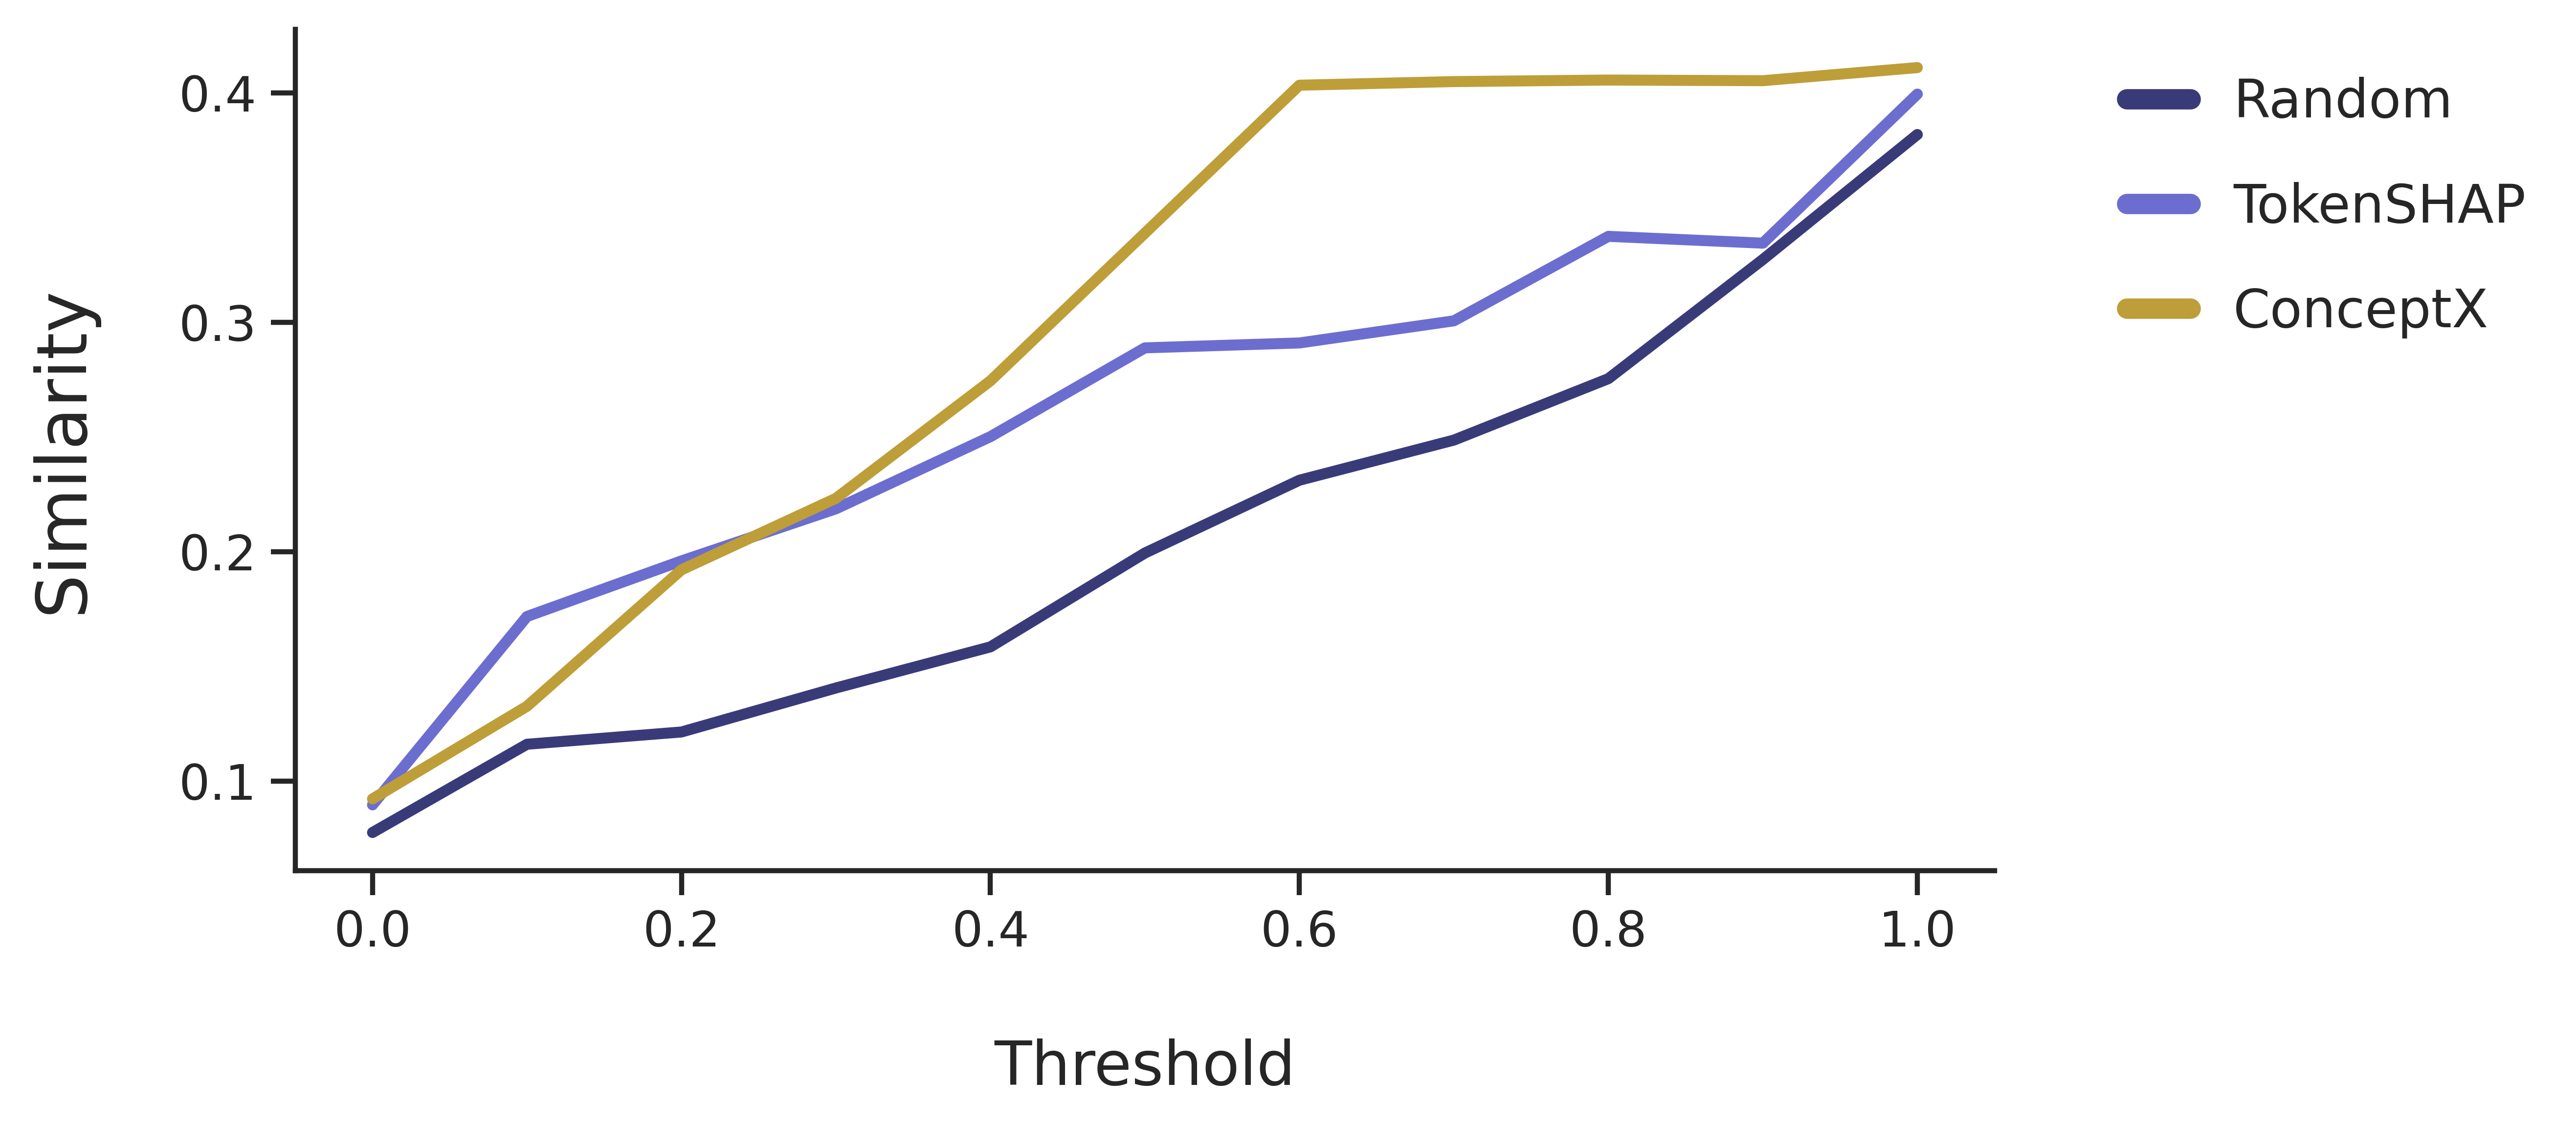

In [6]:
df = df_all


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
print(df[df["explainer"]=="ConceptX-R"])


# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=20)  # Increase space between axis label and ticks
plt.ylabel('Similarity', fontsize=17, labelpad=20)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
ordered_labels = [label for label in legend_order_alpaca]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()